In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")
submission = pd.read_csv("../input/titanic/gender_submission.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
# 랜덤 시드 설정

import random
np.random.seed(1234)
random.seed(1234)

# **데이터의 개요 파악**

**데이터 행과 열 개수 확인**

In [5]:
print(train_df.shape)  # 891행 12열
print(test_df.shape)   # 418행 11열

(891, 12)
(418, 11)


**데이터 내용 미리보기**

In [6]:
# 표시할 수 있는 행과 열 개수를 변경하기위한 코드 

pd.set_option("display.max_columns", 50)
pd.set_option("display.max_rows", 50)

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


**각 열의 의미**
1. Survived (생존 여부) -> 0 = 사망, 1 = 생존
2. Pclass (티켓 등급) -> 1 = 1st, 2 = 2nd, 3 = 3rd
3. Sex (성별)
4. Age (연령)
5. SibSp (승선 중인 형제나 배우자의 수)
6. Parch (승선 중인 부모나 자녀의 수)
7. Ticket (티켓 번호)
8. Fare (티켓 요금)
9. Cabin (방 번호)
10. Embarked (승선한 항구의 이름) -> C = Cherbourg, Q = Queenstown, S = Southampton

**데이터 속성 확인**

In [9]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**데이터의 통계량 확인**

In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


**카테고리 변수 확인**

In [12]:
## 데이터프레임명["열명"].value_counts() 코드로 지정된 열에 포함된 값들과 중복 횟수 등을 확인할 수 있다.

train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [13]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

**결측치 확인**

In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

# **데이터의 시각화**

**라이브러리 불러오기**

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


**표시 스타일 지정**

In [18]:
plt.style.use("ggplot")

## 목적 변수 관련 데이터의 시각화

**데이터프레임에서 임의의 열 추출**

In [19]:
## Embarked 와 Survived 의 관계를 확인

train_df[["Embarked", "Survived", "PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


**시각화하고 싶은 데이터에서 결측치 제외**

In [20]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


**각 행을 Embarked 와 Survived 값으로 집계**

In [21]:
train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

**데이터를 수평으로 변환**

In [22]:
embarked_df = train_df[["Embarked", "Survived", "PassengerId"]].dropna().groupby(["Embarked", "Survived"]).count().unstack()

In [23]:
embarked_df

PassengerId     
Survived           0    1
Embarked                 
C                 75   93
Q                 47   30
S                427  217

**누적 막대 그래프로 시각화**

<AxesSubplot: xlabel='Embarked'>

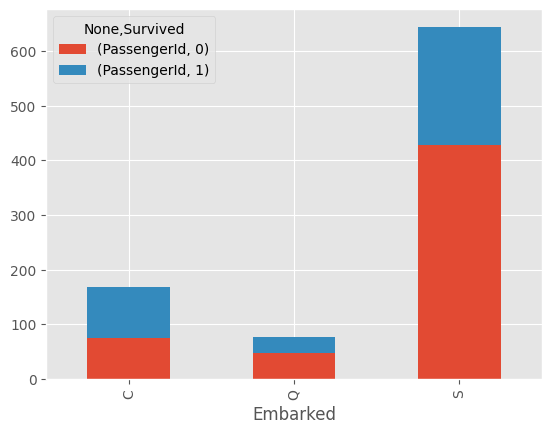

In [24]:
embarked_df.plot.bar(stacked=True)

**⬆ C 항구에서 탄 사람은 절반 정도 사망, Q와 S 항구에서 탄 사람은 절반 이상이 사망 ⬆**

**수치로 확인**

In [25]:
## 0번째 열 사망 수 / (0번째 열 사망 수 + 1번째 열 생존 수)

embarked_df["survived_rate"] = embarked_df.iloc[:,0] / (embarked_df.iloc[:,0] + embarked_df.iloc[:,1])

In [26]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93      0.446429
Q                 47   30      0.610390
S                427  217      0.663043

**성별과 티켓 등급 시각화**

In [27]:
sex_df = train_df[["Sex", "Survived", "PassengerId"]].dropna().groupby(["Sex", "Survived"]).count().unstack()
sex_df

PassengerId     
Survived           0    1
Sex                      
female            81  233
male             468  109

<AxesSubplot: xlabel='Sex'>

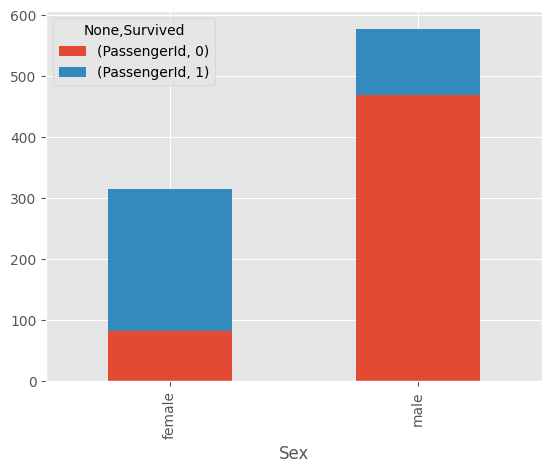

In [28]:
sex_df.plot.bar(stacked=True)

**⬆ 여성을 남성보다 먼저 구조했기 때문에 여성 생존률이 훨씬 높다. ⬆**

In [29]:
ticket_df = train_df[["Pclass", "Survived", "PassengerId"]].dropna().groupby(["Pclass", "Survived"]).count().unstack()
ticket_df

PassengerId     
Survived           0    1
Pclass                   
1                 80  136
2                 97   87
3                372  119

<AxesSubplot: xlabel='Pclass'>

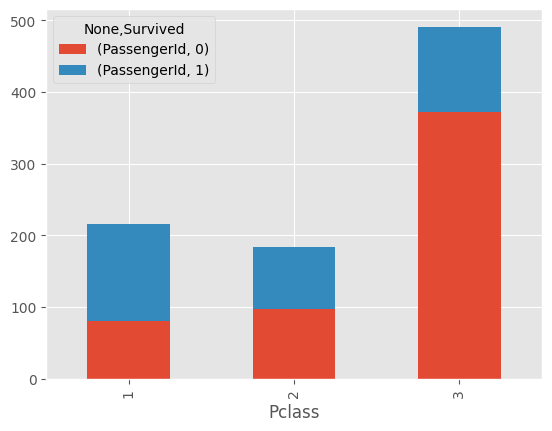

In [30]:
ticket_df.plot.bar(stacked=True)

**⬆ 티켓 등급이 높을수록 생존율이 높다.⬆**

**연령별 생존율을 히스토그램으로 시각화**

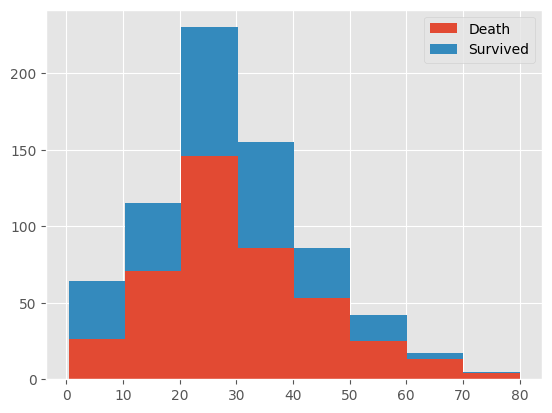

In [31]:
# bins=8 로 빈 개수를 8개로 설정,  histtype='barstacked' 로 히스토그램 막대를 겹치게 보이게 설정, label로 막대에 이름을 지정

plt.hist(x=[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]],
        bins=8, histtype='barstacked', label=["Death", "Survived"])
plt.legend()

**카테고리 변수를 더미 변수화하기**

- 원-핫 코딩 = 어떤 카테고리 변수에 대하여 그 값인지 여부를 1, 0 으로 나타내는 방법
- 1, 0 으로 나나태는 것을 더미 변수화한다고도 한다.

In [32]:
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)  # 하나을 열만 봐도 남, 여를 구분할 수 있으므로 첫 번째 열을 삭제
train_df_corr = pd.get_dummies(train_df_corr, columns=["Embarked"])
train_df_corr.head()
# 총 4개의 행이 추가됨

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,0,1


**상관 행렬 작성**

- 상관 행렬 = 상관 계수를 나열하여 보여 주는 행렬
- 각 변수들의 쌍이 각각 어느 정도의 선형 관계를 가지고 있는지 측정, -1 ~ 1 사이의 값
- 두 변수가 함께 증가하거나 감소하면 상관 계수 값은 양수가 되고, 한쪽 변수가 감소할 때 다른 변수는 반대로 증가하면 상관 계수는 음수가 된다.

In [33]:
train_corr = train_df_corr.corr()
train_corr

/tmp/ipykernel_20/1382093921.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train_df_corr.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_C,Embarked_Q,Embarked_S
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939,-0.001205,-0.033606,0.022148
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351,0.168240,0.003650,-0.155660
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900,-0.243292,0.221009,0.081720
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254,0.036261,-0.022405,-0.032523
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631,-0.059528,-0.026354,0.070941
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489,-0.011069,-0.081228,0.063036
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333,0.269335,-0.117216,-0.166603
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000,-0.082853,-0.074115,0.125722
Embarked_C,-0.001205,0.168240,-0.243292,0.036261,-0.059528,-0.011069,0.269335,-0.082853,1.000000,-0.148258,-0.778359
Embarked_Q,-0.033606,0.003650,0.221009,-0.022405,-0.026354,-0.081228,-0.117216,-0.074115,-0.148258,1.000000,-0.496624


**히트맵으로 상관 행렬 시각화**

<AxesSubplot: >

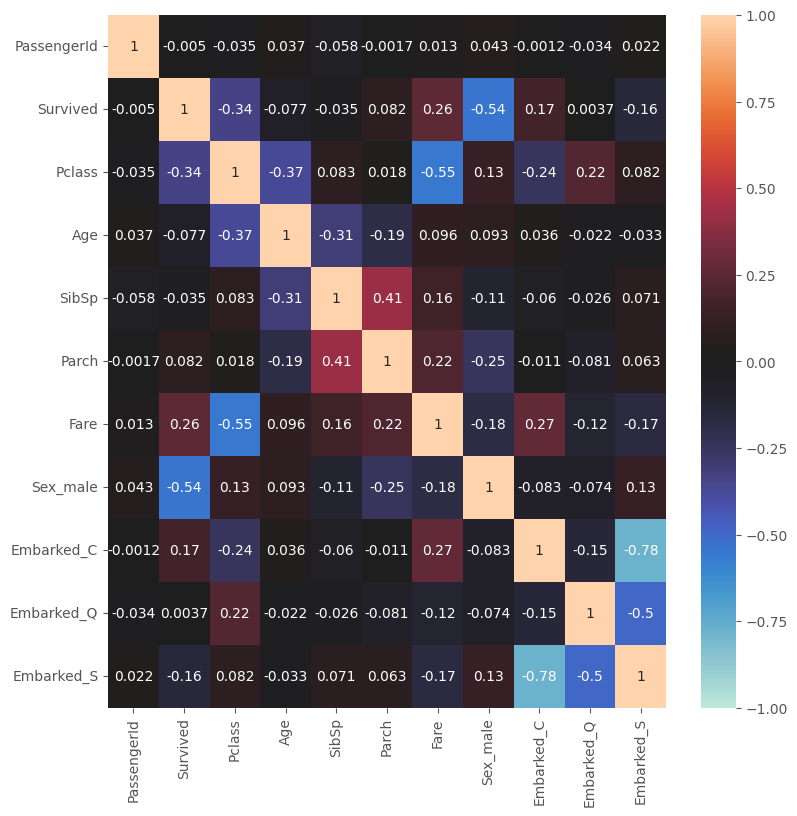

In [34]:
plt.figure(figsize=(9, 9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)  # annot을 True로 설정하면 상관 계수가 각 칸에 숫자로 표기

⬆⬆
- Survived와 상관 관계가 가장 높은 것은 Sex_male로 -0.54의 상관 계수가 나타남
- 남성을 1, 여성을 -1로 놓았기 때문에 상관 계수가 마이너스라는것은 남성 생존율은 낮고 여성 생존율은 높다는걸 알 수 있다.
- 다음으로 Pclass(티켓 등급), Fare(티켓 요금)도 생존 확률에 영향이 있었다고 볼 수 있다.
- Age는 -0.077으로 Survived와 상관없다고 생각
- 상관 계수는 어디까지나 참고만 하는 편이 좋다.

# **데이터 전처리와 특징 값 생성**

**전처리할 데이터**
- Fare (티켓 요금)
- Name (성씨, 호칭, 이름)
- Parch (승선 중인 부모나 자녀의 수)
- SibSp (승선 중인 형제나 배우자의 수)

**학습 데이터와 테스트 데이터의 통합**
- 학습 데이터, 테스트 데이터를 모두 이용하여 전체 집계나 통계 정보를 얻기 위함

In [35]:
# sort=False 로 설정하면 결합 후 행 순서가 바뀌지 않음, reset_index()로 결합한 후 데이터에 행 번호를 다시 매김, drop=True를 써서 원래 행 번호를 삭제

all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**전체 데이터로 결측치 수 확인하기**

In [36]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

**Fare 결측치 메우기**
- Pclass별 Fare의 평균으로 결측치를 채움

In [37]:
Fare_mean = all_df[["Pclass", "Fare"]].groupby("Pclass").mean().reset_index()
Fare_mean

,Pclass,Fare
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [38]:
# 열 이름 변경
Fare_mean.columns = ["Pclass", "Fare_mean"]
Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [39]:
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how="left")  # all_df와 Fare_mean을 Pclass로 연결
all_df.loc[(all_df["Fare"].isnull()), "Fare"] = all_df["Fare_mean"]  # Fare의 결측치를 Fare_mean 값으로 바꾼다.
all_df = all_df.drop("Fare_mean", axis=1)  # Fare_mean은 이제 불필요하므로 삭제

In [40]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


**Name 호칭에 주목**
- Master = 주로 남자 아이에게 사용
- Mr = 일반 남성에게 사용
- Miss = 미혼 여성
- Mrs = 기혼 여성

In [41]:
all_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

**호칭을 변수로 추가**
- ,나 .로 구분하면 2번째에 나오는 요소가 호칭

In [42]:
name_df = all_df["Name"].str.split("[,.]", 2, expand=True)
name_df

/tmp/ipykernel_20/2632515131.py:1: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  name_df = all_df["Name"].str.split("[,.]", 2, expand=True)


,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [43]:
name_df.columns = ["family_name", "honorific", "name"] # 열 이름 변경
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [44]:
# 각 열에 양쪽 공백을 제거
name_df["family_name"] = name_df["family_name"].str.strip()
name_df["honorific"] = name_df["honorific"].str.strip()
name_df["name"] = name_df["name"].str.strip()

**호칭마다 인원수 세기**

In [45]:
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

**호칭별 연령 분포 확인**

In [46]:
# 두 데이터 프레임을 가로로 결합
all_df = pd.concat([all_df, name_df], axis=1)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


<AxesSubplot: xlabel='honorific', ylabel='Age'>

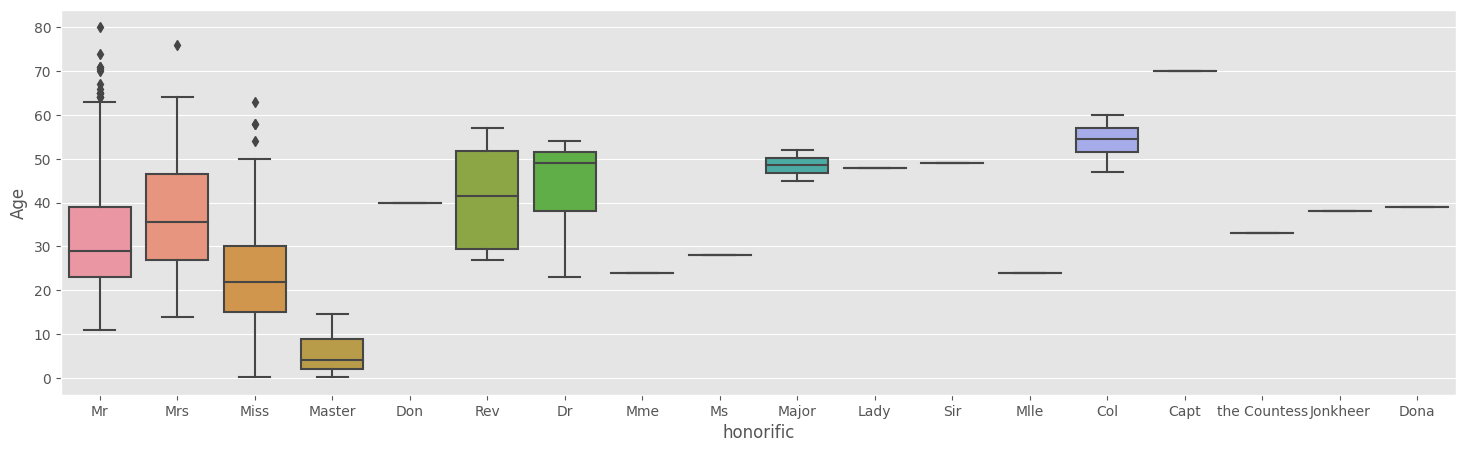

In [47]:
# 박스플롯으로 시각화
plt.figure(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data=all_df)

**호칭별 연령 평균값 확인**

In [48]:
all_df[["Age", "honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


**호칭별 생존율 차이 확인**

In [49]:
# 원래 데이터프레임에 이름을 각각 따로 구분해 놓은 데이터프레임을 결합
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)], axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)], axis=1)

<AxesSubplot: xlabel='honorific'>

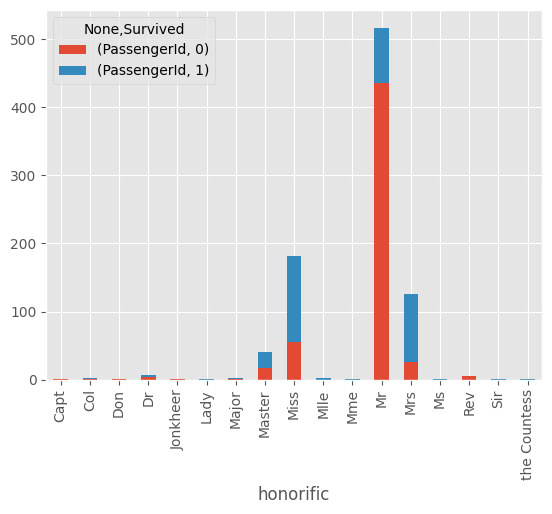

In [50]:
# train_df에서 honorific, Survived, PassengerId를 빼낸 후 결측치를 포함한 행을 삭제하고 honorific, Survived 별로 인원수를 집계
honorific_df = train_df[["honorific", "Survived", "PassengerId"]].dropna().groupby(["honorific", "Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)

**⬆ 여성에게 사용되는 Miss나 Mrs는 생존율이 높음, 남성에게 사용되는 Mr는 사망률이 높음**

**젊은 남성에게 사용되는 Master는 Mr와 비교할 때 생존율이 높음**

**연령은 결측치가 많은 데이터이므로 여기서 구한 호칭 데이터가 연령을 보완하는 효과적인 변수가 될 가능성이 있음**

**가족 인원수 추가**
- 0은 같이 승선한 가족이 없음 = 혼자 승선
- 1은 가족 1명과 승선, 2는 가족 2명과 승선 ...

In [51]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

**홀로 승선했는지 여부를 새로운 변수로 추가**
- 조난 상황에 가족과 함께 행동했을 가능성이 높으므로 홀로 승선했는지, 가족과 승선했는지가 생존에 영향을 줄 수 있다.

In [52]:
all_df.loc[all_df["family_num"]==0, "alone"] = 1
all_df["alone"].fillna(0, inplace=True)
all_df["alone"]

0       0.0
1       0.0
2       1.0
3       0.0
4       1.0
       ... 
1304    1.0
1305    1.0
1306    1.0
1307    1.0
1308    0.0
Name: alone, Length: 1309, dtype: float64

**불필요한 변수 삭제**
- PassengerId = 단순히 승객의 ID로 예측에 불필요
- Name = 이름은 family_name, honorific, name으로 분할했으므로 불필요
- name = Name을 분할한 변수인데 고유 명사고 생존과 관계가 없으므로 불필요
- family_name = 데이터 수에 비해 가족 수가 많고 혼자 가는 승객도 많아 가족 단위 분석은 어려워 불필요
- Ticket = 티켓 번호도 생존 규칙성을 찾기 어려워 불필요
- Cabin = 방번호는 결손값이 많아 불필요

In [53]:
all_df = all_df.drop(["PassengerId", "Name", "family_name", "name", "Ticket", "Cabin"], axis=1)

In [54]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


**카테고리 변수를 수치로 변환**
- Embarked
- Sex
- honorific

In [55]:
categories = all_df.columns[all_df.dtypes=="object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


**Mr, Miss, Mrs, Master 이외는 other로 통합**
- Mr, Miss, Mrs, Master 이외의 호칭은 수가 적어서 학습이 잘 안 될 수 있으므로 other로 통합

In [56]:
all_df.loc[~((all_df["honorific"]=="Mr") | (all_df["honorific"]=="Miss") | (all_df["honorific"]=="Mrs") | (all_df["honorific"]=="Master")), "honorific"] = "other"

In [57]:
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

**문자열을 수치로 변환 : 라벨 인코딩**
- 라벨 인코딩 : 각 카테고리명을 임의의 숫자로 대체하는 방법
- ex) A = 0, B = 1, C = 2

**머신 러닝용 라이브러리 불러오기**
- LabelEncoder()로 초기호환 후 해당 판다스의 열을 학습 시켜 카테고리별 라벨을 생성, 이후 transform() 함수로 원래 열에 다시 적용하면 라벨 인코딩이 된다.
- 결측치가 있으면 작동하지 않기 때문에 Embarked에 포함된 결츠치는 missing등 임의의 문자열로 미리 치환해야함

In [58]:
from sklearn.preprocessing import LabelEncoder

In [59]:
all_df["Embarked"].fillna("missing", inplace=True)

In [60]:
le = LabelEncoder()
le = le.fit(all_df["Sex"])
all_df["Sex"] = le.transform(all_df["Sex"])

In [61]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [62]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0


**모든 데이터를 학습 데이터와 테스트 데이터로 되돌리기**
- Survived 값이 null이 아닐 때는 학습 데이터, null이면 테스트 데이터

In [63]:
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)  # 독립변수(설명 변수)
train_Y = train_df["Survived"]  # 종속 변수(목적 변수)

test_X = all_df[all_df["Survived"].isnull()].drop("Survived", axis=1).reset_index(drop=True)  # 테스트 데이터

# **머신 러닝 모델링**

**캐글 경진대회에서 자주 사용하는 LightGBM 머신 러닝 기법을 사용**
- LightGBM은 결정 트리계의 대표적인 알고리즘

**결정 트리**
- 역치 조건에 따라 데이터 분기를 반복하는 것으로, 회귀 및 분류에 사용하는 방법
- ex) 연령이 30세 이상인가, 남성인가 등 조건을 반복하여 최종적으로 각 조건의 조합에 따른 생존 및 사망 수를 나타냄
- 역치 조건은 '원래 데이터가 어떤 조건에 따라 다른 성질을 가지는 두 데이터로 잘 나뉘었는가'로 자동으로 결정된다.
- 데이터 분석자는 어느 정도까지 분기를 나눌지, 데이터를 나누었을 때 각 그룹의 최저 데이터 수는 얼마로 할지 등을 조정하면서 분류나 예측의 정확도를 향상시킨다.

장점
- 출력될 때까지 과정을 비교적 파악하기 쉽고, 얻은 모델을 수월하게 응용할 수 있어 유용하다.

단점
- 이상치에 약하고 처음 분기가 한쪽으로 잘못 치우쳐 버리면 이후 분기들 모두 정확도가 나빠진다는 단점이 있다.

**랜덤 포레스트**
- 결정 트리를 여러 개 만들어 합하는 앙상블 기법

**LightGBM**
- 병렬로 앙상블하는 것이 아닌 결정 트리를 순서대로 갱신해 나가는 그레디언트 부스팅 결정 트리 기법을 구현하는 방법 중 하나
- 그레디언트 부스팅 결정 트리의 구현 방법 : LightGBM, XGBoost

장점
- 실행 속도가 다른 기법들보다 빠르다.
- 결측치나 카테고리 변수가 포함된 상태에서도 모델을 학습시킬 수 있다.

**LightGBM 라이브러리 불러오기**

In [64]:
import lightgbm as lgb

**과적합, 과소적합**
- 머신러닝의 흐름 : 학습 데이터의 목적 변수(생존 여부)를 예측하고자 여러 가지 설명 변수(연령, 성별, 티켓 등급 등)를 사용하여 모델을 만들고 테스트 데이터에 적용하는 것이 일반적인 머신러닝의 흐름
- 과적합 : 학습 데이터를 너무 과하게 학습하여 학습 데이터에만 지나치게 적절한 모델
- 과소적합 : 학습이 불충분하게 진행되어 정확도가 떨어지는 모델
****
- 과적합을 피하기위해 학습 데이터에서 검증 데이터를 분리하는 과정이 필요
- 학습 데이터로 작성한 모델을 검증 데이터로 검증하는 것
- 방법 : 홀드 아웃, 교차 검증, 잭나이프법

**홀드 아웃**
- 데이터를 어떤 일정 비율(ex.8:2 등)로 학습 데이터와 검증 데이터로 분할하는 방법
- 검증 데이터에 대한 정확도를 보며 모델 학습을 진행하면 검증 데이터 예측에만 과도하게 적합해져 과적합이 될 가능성이 있다.

**교차 검증**
- 데이터 전체를 임의 수의 블록으로 분할해서 그중 블록 한 개는 검증 데이터로 만들고, 나머지는 학습 데이터로 만드는 방법
- 이 과정을 분할된 데이터 수만큼 반복
- 홀드 아웃과 비교하면 좀 더 많은 데이터로 미지의 데이터 대한 정확도를 검증할 수 있어 더욱 좋은 모델을 만들 수 있다.

**잭나이프법**
- 전체 테스트 중 하나를 검증 데이터로, 나머지를 학습 데이터로 하는 과정을 전체 데이터 수만큼 반복하는 방법
- 데이터 수가 적을 때 이용하는 검증 방법

**홀드 아웃, 교차 검증 실습을 위한 라이브러리 불러오기**

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

**학습 데이터의 20%를 검증 데이터로 분할하기**

In [66]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

**LightGBM용 데이터셋 작성하기**
- X_train, y_train 데이터로 학습하고 X_valid의 예측 정확도를 확인

In [67]:
categories = ["Embarked", "Pclass", "Sex", "honorific", "alone"]

In [68]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

**하이퍼파라미터 설정하기**
- binary : 2차 분류
- regression : 회귀
- multiclass : 다클래스 분류

In [69]:
# 생존과 사망 값이 두 개로 분류되므로 binary로 설정

lgbm_params = {
    "objective" : "binary",
    "random_seed" : 1234
}

**LightGBM으로 머신 러닝 모델 학습**
- num_boost_round : 학습 횟수 지정
- early_stopping_rounds : 학습할 때 몇 번 연속으로 결과가 개선되지 않으면 학습을 중지할지 지정
- verbose_eval : 학습 결과의 표시 빈도를 지정

In [70]:
model_lgb = lgb.train(lgbm_params, 
                      lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10
                     )

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000997 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

**⬆ 가장 밑에 최고 점수가 나옴** 

**각 변수의 중요도 조사**
- 어떤 설명 변수가 얼마나 중요한 역할을 했는지 알아봄
- feature_importance()를 사용

In [71]:
model_lgb.feature_importance()


array([ 32,  15, 254,  16,  10, 234,  22,   9,  15,   7], dtype=int32)

<AxesSubplot: >

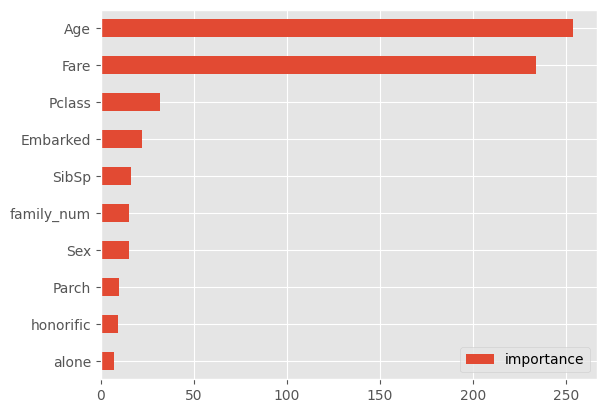

In [72]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns,
                         columns=["importance"]).sort_values(by="importance", ascending=True)
importance.plot.barh()

**⬆ Age, Fare, Pclass 등이 중요한 변수로 파악, 어린 아이와 상위 클래스 고객이 우선적으로 구조되었을 가능성을 볼 수 있다.**

## 검증 데이터로 예측 정확도 확인

**모델을 검증 데이터에 적용**
- predict(예측하고 싶은 데이터)
- num_iteration 인수에 모델명.best_iteration을 지정하면 정확도가 가장 높을 때의 학습 모델을 사용하여 예측

In [73]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

**예측 정확도 출력**
- 정확도 : 모든 예측 중 정확하게 예측한 비율
- accuracy = (TP + TN) / (TP + TN + FP + FN

**정확도를 계산하는 라이브러리 불러오기**

In [74]:
from sklearn.metrics import accuracy_score

In [75]:
accuracy_score(y_valid, np.round(y_pred))

0.8268156424581006

**⬆ 검증 데이터로 현재 모델이 약 0.827의 정확도를 보이고 있다.**

**하이퍼파라미터 변경하기**
- **learning_rate**    | 기본값 = 0.1 | 학습 속도, 각 과정의 학습을 어느 정도 반영할지 결정
- **max_bin**         | 기본값 = 255 | 분기 한 개에 들어가는 데이터의 최댓값, 작으면 잘게 나누어 학습을 진행, 크면 범용성이 높아짐
- **num_leaves**       | 기본값 = 31  | 하나의 결정 트리에 포함된 최대 노드 개수, 결정 트리의 복잡성을 제어
- **min_data_in_leaf** | 기본값 = 20  | 결정 트리 중 하나의 가지당 할당되는 데이터 수, 과도한 학습을 제어하기 위해 설정, 데이터 수에 따라 조정

In [76]:
lgbm_params = {
    "objective" : "binary",
    "max_bin" : 331,
    "num_leaves" : 20,
    "min_data_in_leaf" : 57,
    "random_seed" : 1234
}

In [77]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [78]:
model_lgb = lgb.train(lgbm_params,
                     lgb_train,
                     valid_sets=lgb_eval,
                     num_boost_round=100,
                     early_stopping_rounds=20,
                     verbose_eval=10)

[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000854 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 222
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas

In [79]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [80]:
accuracy_score(y_valid, np.round(y_pred))

0.8324022346368715

**⬆ 값 하나를 바꾸는 것만으로는 정확도가 올라가지 않는 경우도 많다. 따라서 요소 여러 개를 조합해야 할 때가 있다.**

## 교차 검증을 이용한 학습
- 세 개로 분할하는 3-fold 교차 검증을 사용

In [81]:
folds = 3
kf = KFold(n_splits=folds)

In [82]:
models = []
for train_index, val_index in kf.split(train_X):  # kf 만큼 train_X를 분할 (학습 데이터와 테스트 데이터가 각각 세 개씩 만들어진다.)
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
    
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)
    
    model_lgb = lgb.train(lgbm_params,
                         lgb_train,
                         valid_sets=lgb_eval,
                         num_boost_round=100,
                         early_stopping_rounds=20,
                         verbose_eval=10)
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    print(accuracy_score(y_valid, np.round(y_pred)))
    models.append(model_lgb)

/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Datas

[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000842 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 203
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM]

/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/opt/conda/lib/python3.10/site-packages/lightgbm/basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


**⬆ models 리스트에 세 개의 모델이 들어감**

**테스트 데이터의 예측 결과 산출**
- 빈 리스트 preds
- 세 개의 모델을 각각 테스트 데이터의 결과를 예측해 그 값을 preds에 저장

In [83]:
preds = []

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

**예측 결과의 평균 구하기**
- np.array(preds) : numpy로 다룰 수 있는 형식으로 변환
- axis = 0 : 행 기준
- axis = 1 : 열 기준

In [84]:
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

In [85]:
preds_mean

array([0.12427356, 0.45760904, 0.08142812, 0.15725226, 0.52770486,
       0.10524224, 0.60062064, 0.16208469, 0.68782673, 0.05850089,
       0.05385675, 0.15489413, 0.93978706, 0.05703497, 0.91471842,
       0.92842653, 0.14836309, 0.17931203, 0.54447066, 0.55443434,
       0.31195279, 0.55345908, 0.94037992, 0.42898052, 0.86269487,
       0.0488382 , 0.94828122, 0.18388372, 0.39388335, 0.14765961,
       0.05837329, 0.11692913, 0.38754432, 0.41172967, 0.51212793,
       0.18424136, 0.55060456, 0.3870091 , 0.09256179, 0.26518982,
       0.08564934, 0.3638082 , 0.06696098, 0.87261507, 0.91499482,
       0.17703117, 0.33040097, 0.07658601, 0.9207839 , 0.57765447,
       0.37290608, 0.19375516, 0.69619891, 0.79037198, 0.18664163,
       0.19742936, 0.08686094, 0.14826901, 0.1077915 , 0.95025494,
       0.12874076, 0.20083942, 0.11567089, 0.61004721, 0.68996518,
       0.94436201, 0.64540641, 0.29921767, 0.48307951, 0.80846474,
       0.61364373, 0.09672552, 0.54376847, 0.47204121, 0.95025

**지금까지는 예측 생존 확률을 구하는 과정이었고, 생존이나 사망을 예측하기 위해 결과를 0이나 1로 변환한다.**
- 0.5보다 큰 경우를 1(생존)으로 예측해본다.

In [86]:
preds_int = (preds_mean > 0.5).astype(int)

In [87]:
preds_int

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

**submission 파일 생성**
- submission 파일을 생성해서 결과를 제출

In [88]:
submission["Survived"] = preds_int

In [89]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


**결과를 CSV로 저장**

In [90]:
submission.to_csv("titanic_submit01.csv", index=False) # 인덱스 번호 필요없음

# **정확도 이외의 여러가지 분석**

## 타이타닉에는 어떤 사람이 승선하고 있었는가?

**데이터 전체를 특징이 비슷한 여러 집합으로 나누는 방법**
- 어느 한 값에 주목하여 나누는 방법 : 티켓 등급별로 승객에 어떤 차이가 있는지
- 통계 및 머신 러닝을 이용하는 방법 : k-means, t-SNE 등 방법을 이용해 데이터를 자동으로 '특징이 닮은' 그룹으로 분류, '특징이 비슷하다'를 정의하는 것에도 여러가지가 있다. ex) 유클리드 거리 등

**티켓 등급별 인원수 확인**
- 데이터를 다시 읽어 온다.

In [91]:
train_df = pd.read_csv("../input/titanic/train.csv")
test_df = pd.read_csv("../input/titanic/test.csv")
all_df = pd.concat([train_df, test_df], sort=False).reset_index(drop=True)

In [92]:
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot: >

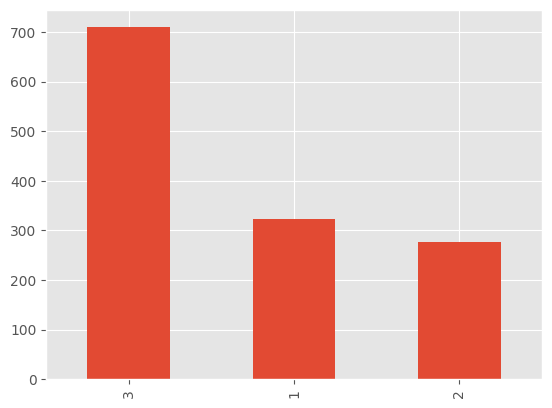

In [93]:
all_df.Pclass.value_counts().plot.bar()

**요금 분포 확인**

In [94]:
all_df[["Pclass", "Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

<AxesSubplot: xlabel='Pclass', ylabel='Fare'>

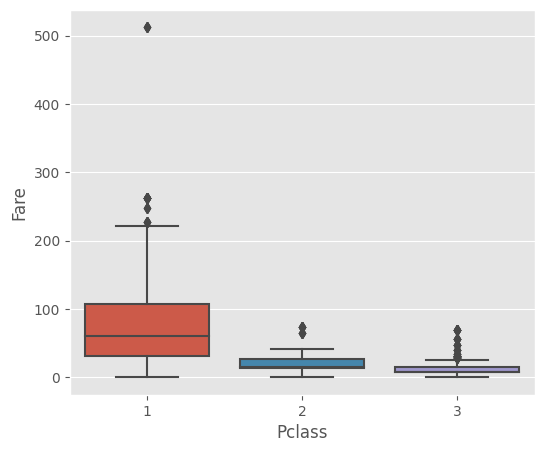

In [95]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Pclass", y="Fare", data=all_df)

**1등급 티켓 중 고액권(상위 25%)을 Pclass0으로 만들기**

In [96]:
all_df["Pclass2"] = all_df["Pclass"]

**Pclass2 중 Fare가 108보다 큰 것을 0등급으로 변경**
- 어떤 조건에 따라 값을 바꾸려면 loc을 사용해서 데이터프레임 안에서 행과 열을 지정

In [97]:
all_df.loc[all_df["Fare"]>108, "Pclass2"] = 0

In [98]:
all_df[all_df["Pclass2"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


In [99]:
all_df.Pclass2

0       3
1       1
2       3
3       1
4       3
       ..
1304    3
1305    0
1306    3
1307    3
1308    3
Name: Pclass2, Length: 1309, dtype: int64

<AxesSubplot: xlabel='Pclass2', ylabel='Fare'>

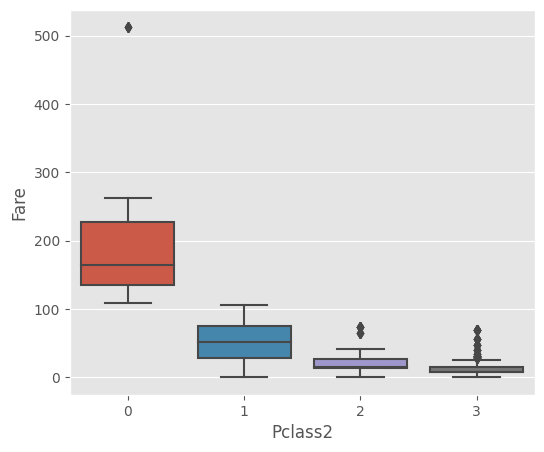

In [100]:
plt.figure(figsize=(6, 5))
sns.boxplot(x="Pclass2", y="Fare", data=all_df)

**티켓 등급별 연령 분포 확인**

In [101]:
all_df[["Pclass2", "Age"]].groupby("Pclass2").describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

<AxesSubplot: xlabel='Pclass2', ylabel='Age'>

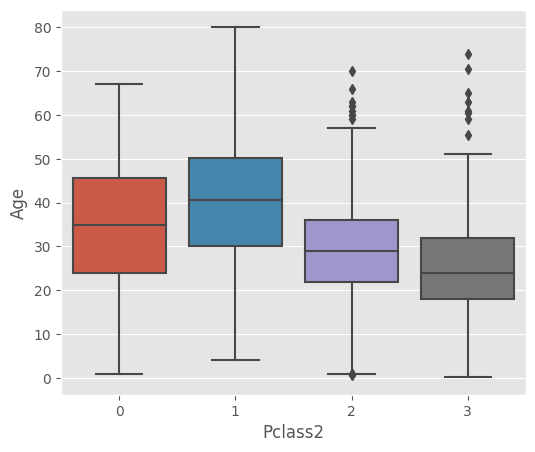

In [102]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2", y="Age", data=all_df)

**15세 이상을 대상으로 분석**

In [103]:
all_df[all_df["Age"] > 15][["Pclass", "Age"]].groupby("Pclass").describe()

Age                                                    
        count       mean        std   min   25%   50%   75%   max
Pclass                                                           
1       276.0  40.056159  13.724680  16.0  29.0  39.0  50.0  80.0
2       233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3       422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

<AxesSubplot: xlabel='Pclass2', ylabel='Age'>

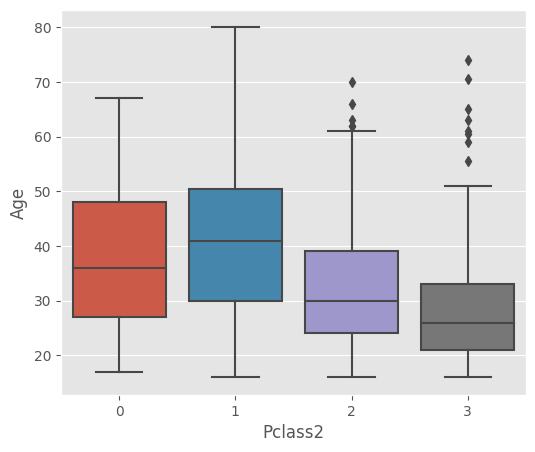

In [104]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2", y="Age", data=all_df[all_df["Age"] > 15])

**연령과 티켓 요금의 분포 확인**

<AxesSubplot: xlabel='Age', ylabel='Fare'>

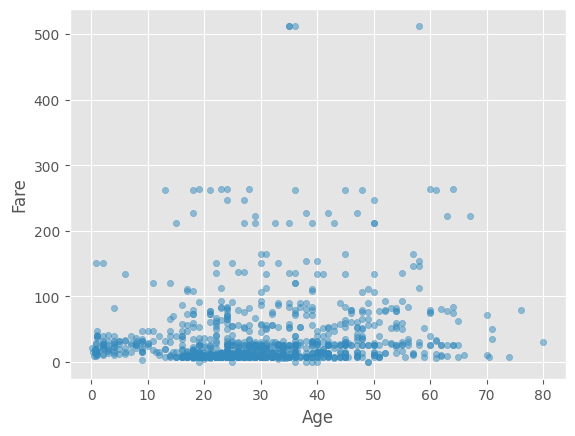

In [105]:
all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)

**티켓 등급별 승선 가족 수 확인**

In [106]:
all_df["family_num"] = all_df["SibSp"] + all_df["Parch"]

In [107]:
all_df[["Pclass2", "family_num"]].groupby("Pclass2").describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

<AxesSubplot: xlabel='Pclass2', ylabel='family_num'>

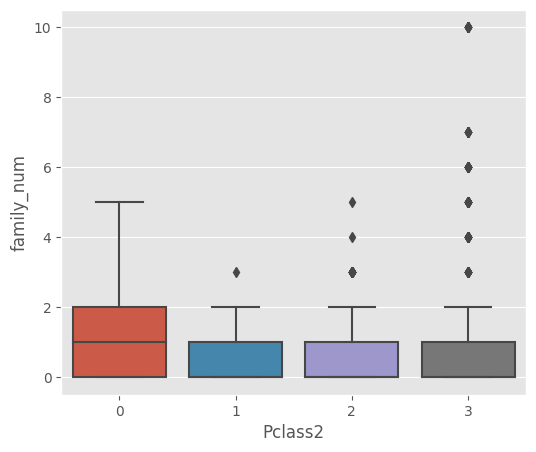

In [108]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2", y="family_num", data=all_df)

**티켓 등급별 남녀 비율 확인**

In [109]:
Pclass_gender_df = all_df[["Pclass2", "Sex", "PassengerId"]].dropna().groupby(["Pclass2", "Sex"]).count().unstack()

<AxesSubplot: xlabel='Pclass2'>

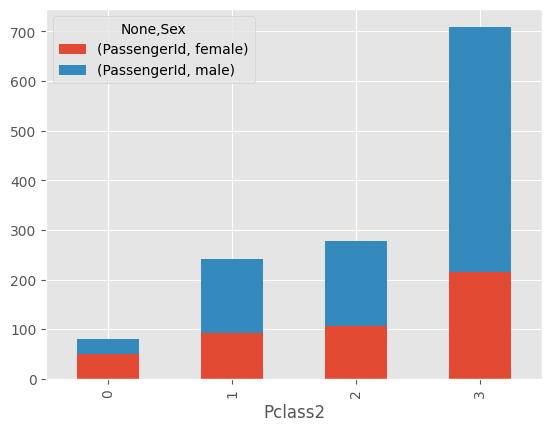

In [110]:
Pclass_gender_df.plot.bar(stacked=True)

In [111]:
Pclass_gender_df["male_ratio"] = Pclass_gender_df["PassengerId", "male"] / (Pclass_gender_df["PassengerId", "male"] + Pclass_gender_df["PassengerId", "female"])

In [112]:
Pclass_gender_df

PassengerId      male_ratio
Sex          female male           
Pclass2                            
0                51   30   0.370370
1                93  149   0.615702
2               106  171   0.617329
3               216  493   0.695346

**승선 항구별 차이 확인**

In [113]:
Pclass_emb_df = all_df[["Pclass2", "Embarked", "PassengerId"]].dropna().groupby(["Pclass2", "Embarked"]).count().unstack()

In [114]:
Pclass_emb_df = Pclass_emb_df.fillna(0)

<AxesSubplot: xlabel='Pclass2'>

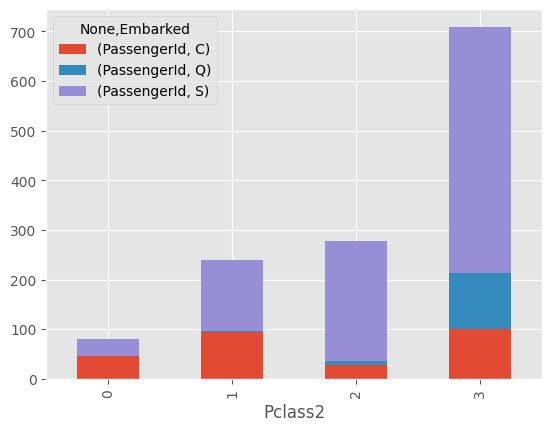

In [115]:
Pclass_emb_df.plot.bar(stacked=True)

In [116]:
Pclass_emb_df_ratio = Pclass_emb_df.copy()
Pclass_emb_df_ratio["sum"] = Pclass_emb_df_ratio["PassengerId", "C"] + Pclass_emb_df_ratio["PassengerId", "Q"] + Pclass_emb_df_ratio["PassengerId", "S"]
Pclass_emb_df_ratio["PassengerId", "C"] = Pclass_emb_df_ratio["PassengerId", "C"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId", "Q"] = Pclass_emb_df_ratio["PassengerId", "Q"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio["PassengerId", "S"] = Pclass_emb_df_ratio["PassengerId", "S"] / Pclass_emb_df_ratio["sum"]
Pclass_emb_df_ratio = Pclass_emb_df_ratio.drop(["sum"], axis=1)

In [117]:
Pclass_emb_df_ratio

PassengerId                    
Embarked           C         Q         S
Pclass2                                 
0           0.580247  0.000000  0.419753
1           0.391667  0.012500  0.595833
2           0.101083  0.025271  0.873646
3           0.142454  0.159379  0.698166

<AxesSubplot: xlabel='Pclass2'>

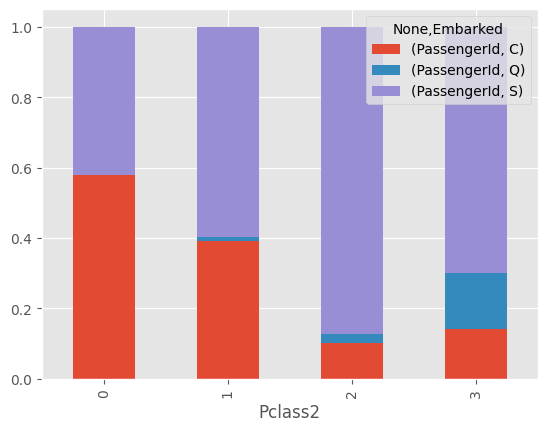

In [118]:
Pclass_emb_df_ratio.plot.bar(stacked=True)

**분석 정리하기**
- 0등급 : 동반자가 많고 남성 비율이 다른 티켓 등급보다 낮다. 연령대가 약간 높다. Cherbourg에서 승선한 사람이 많다.
- 1등급 : 다른 등급에 비해 연령대가 가장 높다. 1인 승선률이 가장 높고 대가족 승선은 없다.
- 2등급 : 1등급과 3등급의 중간적인 경향을 보인다. Southampton에서 승선한 비율이 가장 높다.
- 3등급 : 1인부터 대가족까지 다양한 인원이 승선했다. 다른 클래스보다 Queenstown에서 승선한 비율이 높다.

## **특정 클러스터에 주목**

**Cherbourg에서 혼자 승선한 젊은 승객이라는 그룹의 특징 분석**

In [119]:
C_young10 = all_df[(all_df["Embarked"] == "C") & (all_df["Age"] // 10 == 1) & (all_df["family_num"] == 0)]

In [120]:
C_young20 = all_df[(all_df["Embarked"] == "C") & (all_df["Age"] // 10 == 2) & (all_df["family_num"] == 0)]

In [121]:
len(C_young10)

7

In [122]:
len(C_young20)

31

**Cherbourg에서 탑승한 젊은 승객의 요금 분포 알아보기**

**전체 승객 중 C에서 홀로 승선한 10대 승객 분포**

<AxesSubplot: xlabel='Age', ylabel='Fare'>

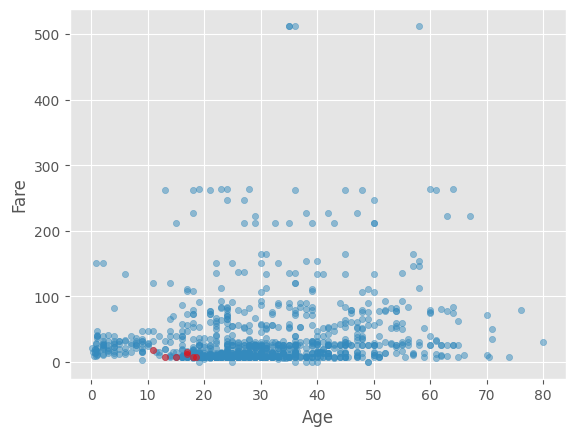

In [123]:
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young10.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

**홀로 승선한 모든 승객 중 C에서 승선한 승객 분포**


<AxesSubplot: xlabel='Age', ylabel='Fare'>

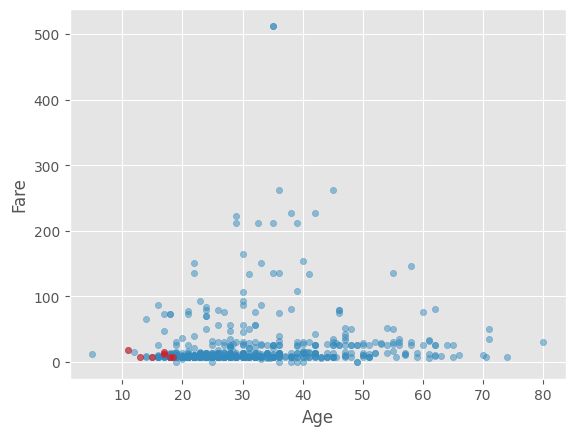

In [124]:
ax = all_df[all_df["family_num"]==0].plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young10.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

**C에서 홀로 승선한 20대 승객 분포**

<AxesSubplot: xlabel='Age', ylabel='Fare'>

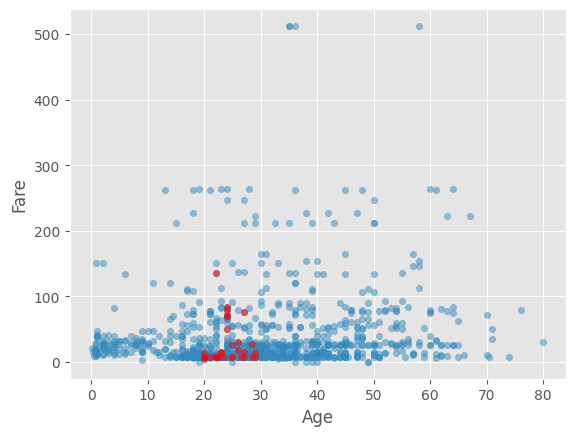

In [125]:
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young20.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

<AxesSubplot: xlabel='Age', ylabel='Fare'>

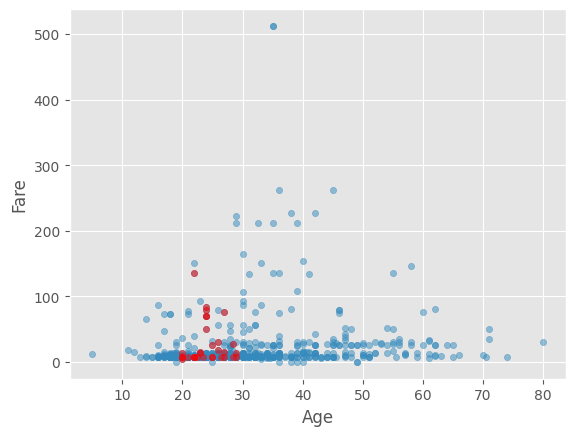

In [126]:
ax = all_df[all_df["family_num"]==0].plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young20.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

**C 승객을 전체 중에서 표시**

<AxesSubplot: xlabel='Age', ylabel='Fare'>

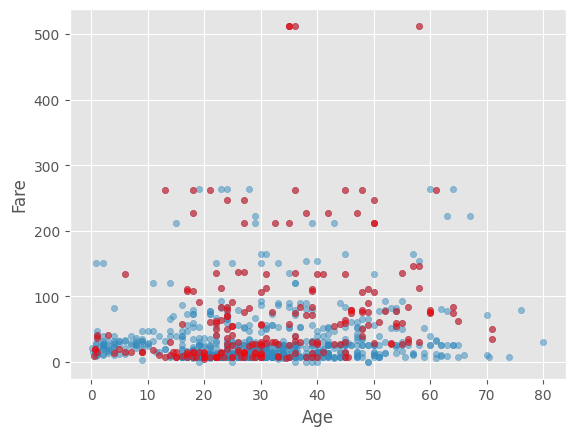

In [127]:
C_all = all_df[(all_df["Embarked"]=="C")]
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_all.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

**홀로 승선한 10대 승객의 항구별 평균 요금 비교**

In [128]:
all_df[(all_df["Age"] // 10 == 1) & (all_df["family_num"]==0)][["Embarked", "Fare"]].groupby("Embarked").mean()

,Fare
Embarked,
C,10.594057
Q,7.531944
S,16.218712
